# Xente fraud detection

## Content

1. Intro
1. Getting the data
2. EDA

## 1. Intro
Xente is a payment service.
Have a look on the website or this video to learn more.

Video: https://www.loom.com/share/95af830a57f5452085fe73e2f4edd414

Website: https://www.xente.co


## Set-up and Import

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import fbeta_score, make_scorer


# Define a plotting style to be used for all plots in this notebook
plt.style.use('tableau-colorblind10')

## Getting the data
The data is available on zindi: https://zindi.africa/competitions/xente-fraud-detection-challenge/data

In [2]:
df = pd.read_csv('data/training.csv')
df.columns = df.columns.str.lower()
df.head()


,transactionid,batchid,accountid,subscriptionid,customerid,currencycode,countrycode,providerid,productid,productcategory,channelid,amount,value,transactionstarttime,pricingstrategy,fraudresult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
df.shape

(95662, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transactionid         95662 non-null  object 
 1   batchid               95662 non-null  object 
 2   accountid             95662 non-null  object 
 3   subscriptionid        95662 non-null  object 
 4   customerid            95662 non-null  object 
 5   currencycode          95662 non-null  object 
 6   countrycode           95662 non-null  int64  
 7   providerid            95662 non-null  object 
 8   productid             95662 non-null  object 
 9   productcategory       95662 non-null  object 
 10  channelid             95662 non-null  object 
 11  amount                95662 non-null  float64
 12  value                 95662 non-null  int64  
 13  transactionstarttime  95662 non-null  object 
 14  pricingstrategy       95662 non-null  int64  
 15  fraudresult        

In [5]:
df.nunique()

transactionid           95662
batchid                 94809
accountid                3633
subscriptionid           3627
customerid               3742
currencycode                1
countrycode                 1
providerid                  6
productid                  23
productcategory             9
channelid                   4
amount                   1676
value                    1517
transactionstarttime    94556
pricingstrategy             4
fraudresult                 2
dtype: int64

#### transactionid
- Unique transaction identifier on platform
- is unique, like a index 
- we deleted the TransactionId_

In [6]:
# delete the column name in rows
df["transactionid"] = df["transactionid"].apply(lambda x: x.replace("TransactionId_", ""))

#### batchid 
- Unique number assigned to a batch of transactions for processing
- drop the letters
- do not know if it is important

In [7]:
# delete the column name in rows
df["batchid"] = df["batchid"].apply(lambda x: x.replace("BatchId_", ""))

In [8]:
#df['batchid'].value_counts()
# most batches have just one entrance, some have more see example
# 67019     28
# 51870     16
# 113893    14
# 127204    12
# 116835    10

#### accountid
- Unique number identifying the customer on (xente) platform
- every customer gets an ID
- drop the letters

In [9]:
# delete the column name in rows
df["accountid"] = df["accountid"].apply(lambda x: x.replace("AccountId_", ""))

In [10]:
#df['accountid'].value_counts()
#Some Accounts have a lot of entries
#4841    30893
#4249     4457
#4840     1738
#3206     1105
#318      1070

#### subscriptionid
- Unique number identifying the customer subscription
- drop the letters

In [12]:
# delete the column name in rows
df["subscriptionid"] = df["subscriptionid"].apply(lambda x: x.replace("SubscriptionId_", ""))

In [65]:
#df['subscriptionid'].value_counts()
#3829    32630
#4429     4457
#1372     1105
#3087     1070
#4346      965

#### customerid  
- Unique identifier attached to Account
- buisnes partner/company who need financial services, uses xente 
- drop the letters


In [11]:
# delete the column name in rows
df["customerid"] = df["customerid"].apply(lambda x: x.replace("CustomerId_", ""))

In [67]:
#df['customerid'].value_counts()
#7343    4091
#3634    2085
#647     1869
#1096     784
#4033     778

#### currencycode and countrycode 
- have just one entrance and containe no information
- Country currency
- Numerical geographical code of country
- we delete them


In [68]:
#df.currencycode.nunique()
#df.countrycode.nunique()

In [13]:
df.drop('currencycode', axis=1, inplace=True)
df.drop('countrycode', axis=1, inplace=True)
#df.head()

#### providerid
- Source provider of Item bought
- this is the phone company/utilities company

- needs to be transformed to dummies

In [14]:
df['providerid'].value_counts()

ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: providerid, dtype: int64

#### productid
- Item name being bought
- products of customer companies
- 23 entrances from 32.635 to 1
- need to be transformed to dummies

In [71]:
#df['productid'].value_counts()

#### productcategory
- ProductIds are organized into these broader product categories.
- 9 categories from 45.405 to 2

In [15]:
#df['productcategory'].value_counts()

#### channelid
- Identifies if customer used web,Android, IOS, pay later or checkout.
- 4 categories
- dummies

In [16]:
df['channelid'].value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: channelid, dtype: int64

#### amount
- Value of the transaction. Positive for debits from customer account and negative for credit into customer account
- 1676 values, numbers positive and negative
- how to deal with negative values?
- maybe normalise?

#### value
- Absolute value of the amount
- all positive 
- 1517 why are there less- because positive and negative together

#### transactionstarttime
- Transaction start time

#### pricingstrategy
- Category of Xente's pricing structure for merchants
- 4 categories
-needs dummies

#### fraudresult,
- Fraud status of transaction 1 -yes or 0-No
- extremely unbalanced 
- 0   - 95469
- 1   -  193

In [92]:
df[df['fraudresult'] == 1].groupby('productcategory').count()

,transactionid,batchid,accountid,subscriptionid,customerid,providerid,productid,channelid,amount,value,transactionstarttime,pricingstrategy,fraudresult
productcategory,,,,,,,,,,,,,
airtime,18,18,18,18,18,18,18,18,18,18,18,18,18
financial_services,161,161,161,161,161,161,161,161,161,161,161,161,161
transport,2,2,2,2,2,2,2,2,2,2,2,2,2
utility_bill,12,12,12,12,12,12,12,12,12,12,12,12,12


In [94]:
df[df['fraudresult'] == 1].groupby('channelid').count()

,transactionid,batchid,accountid,subscriptionid,customerid,providerid,productid,productcategory,amount,value,transactionstarttime,pricingstrategy,fraudresult
channelid,,,,,,,,,,,,,
ChannelId_1,4,4,4,4,4,4,4,4,4,4,4,4,4
ChannelId_2,5,5,5,5,5,5,5,5,5,5,5,5,5
ChannelId_3,184,184,184,184,184,184,184,184,184,184,184,184,184


In [96]:
df[df['fraudresult'] == 1].groupby('productid').count()

,transactionid,batchid,accountid,subscriptionid,customerid,providerid,productcategory,channelid,amount,value,transactionstarttime,pricingstrategy,fraudresult
productid,,,,,,,,,,,,,
ProductId_10,6,6,6,6,6,6,6,6,6,6,6,6,6
ProductId_13,6,6,6,6,6,6,6,6,6,6,6,6,6
ProductId_15,157,157,157,157,157,157,157,157,157,157,157,157,157
ProductId_21,4,4,4,4,4,4,4,4,4,4,4,4,4
ProductId_22,2,2,2,2,2,2,2,2,2,2,2,2,2
ProductId_3,12,12,12,12,12,12,12,12,12,12,12,12,12
ProductId_5,2,2,2,2,2,2,2,2,2,2,2,2,2
ProductId_6,1,1,1,1,1,1,1,1,1,1,1,1,1
ProductId_9,3,3,3,3,3,3,3,3,3,3,3,3,3


In [106]:
df[df['fraudresult'] == 1].groupby('amount').count().sort_values('amount',ascending=False).head(60)


,transactionid,batchid,accountid,subscriptionid,customerid,providerid,productid,productcategory,channelid,value,transactionstarttime,pricingstrategy,fraudresult
amount,,,,,,,,,,,,,
9880000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
9870000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
9860888.0,1,1,1,1,1,1,1,1,1,1,1,1,1
9856000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
9850000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
9800000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
8600000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
7000000.0,1,1,1,1,1,1,1,1,1,1,1,1,1
5000000.0,13,13,13,13,13,13,13,13,13,13,13,13,13


# Exploring

In [86]:
# creation of correlation matrix
corrM = df.corr()
 
corrM

,amount,value,pricingstrategy,fraudresult
amount,1.000000,0.989692,-0.061931,0.557370
value,0.989692,1.000000,-0.017020,0.566739
pricingstrategy,-0.061931,-0.017020,1.000000,-0.033821
fraudresult,0.557370,0.566739,-0.033821,1.000000


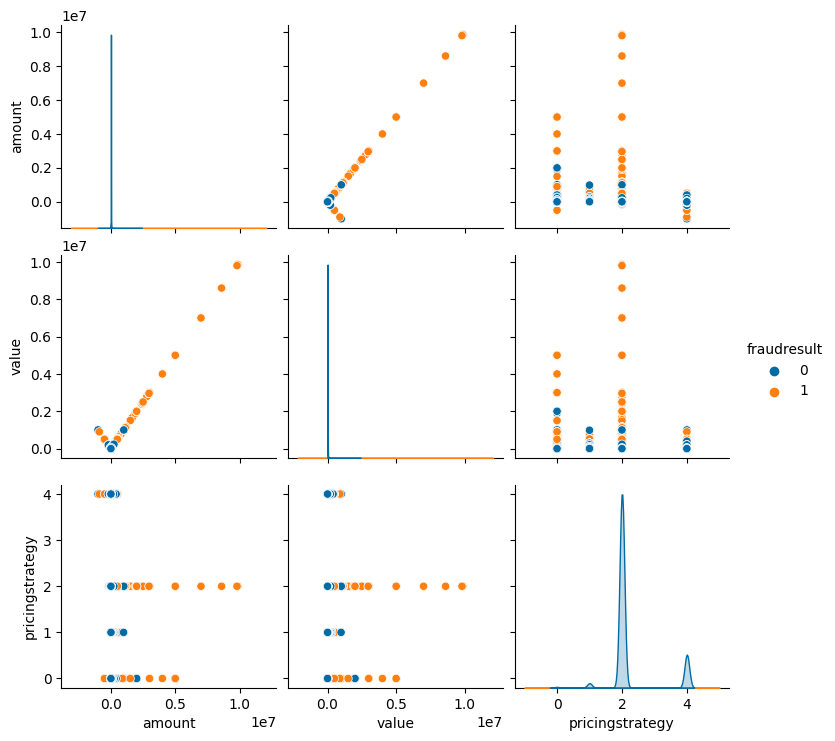

In [88]:
sns.pairplot(df, hue="fraudresult");

In [23]:
#how to make correlations with categorical features?
#pd.DataFrame(df.corr()['FraudResult'].sort_values(ascending=False))

# Missing values

In [18]:
# No NAS in Dataset
# Also test NAS in test dataset!

#print('Number of missing rows in invoice_train:',df.isna().sum().sum())
print('Number of missing rows in invoice_train:',df.isna().sum())

Number of missing rows in invoice_train: transactionid           0
batchid                 0
accountid               0
subscriptionid          0
customerid              0
providerid              0
productid               0
productcategory         0
channelid               0
amount                  0
value                   0
transactionstarttime    0
pricingstrategy         0
fraudresult             0
dtype: int64


In [19]:
df.isnull().values.any()

False

In [20]:
def isnull_values_sum(df):
    return df.isnull().values.sum() > 0

isnull_values_sum(df)

False

In [24]:
df.isnull().sum()

transactionid           0
batchid                 0
accountid               0
subscriptionid          0
customerid              0
providerid              0
productid               0
productcategory         0
channelid               0
amount                  0
value                   0
transactionstarttime    0
pricingstrategy         0
fraudresult             0
dtype: int64

In [25]:
df.describe()

,amount,value,pricingstrategy,fraudresult
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018
std,1.233068e+05,1.231221e+05,0.732924,0.044872
min,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000


In [26]:
df.head(1)

,transactionid,batchid,accountid,subscriptionid,customerid,providerid,productid,productcategory,channelid,amount,value,transactionstarttime,pricingstrategy,fraudresult
0,76871,36123,3957,887,4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0


In [40]:
#(df['value']==0).count
#df['fraudresult'].value_counts()[0] #95469
#df['value'].value_counts()[0] #error-seems like no 0
df['pricingstrategy'].value_counts()[0] #385 is a category and not missing values???!!!

385

In [ ]:
# dataset seems complete

# Data cleaning
If we have no missing values we do not have to modifie or clean them.
Did I forgot something?

# Data visualisiation